# SD212: Graph mining
## Lab 7: Graph embedding

In this lab, you will learn to embed the nodes of a graph in a vector space of low dimension.

## Import

In [1]:
from IPython.display import SVG

In [2]:
import numpy as np
from scipy import sparse

In [3]:
from sknetwork.data import load_netset, karate_club
from sknetwork.embedding import Spectral, BiSpectral  # the target class
from sknetwork.linalg import HalkoEig
from sknetwork.ranking import top_k
from sknetwork.utils import KMeansDense
from sknetwork.visualization import svg_graph

## Pre-lab

In [12]:
# answering the quiz:
P = np.array([[0, 1/2, 0, 0, 0, 1/2],
              [1/2, 0, 1/2, 0, 0, 0],
              [0, 1/2, 0, 1/2, 0, 0],
              [0, 0, 1/2, 0, 1/2, 0],
              [0, 0, 0, 1/2, 0, 1/2],
              [1/2, 0, 0, 0, 1/2, 0]])
np.linalg.eig(P)
HalkoEig(P)

HalkoEig(which=[[0.  0.5 0.  0.  0.  0.5]
 [0.5 0.  0.5 0.  0.  0. ]
 [0.  0.5 0.  0.5 0.  0. ]
 [0.  0.  0.5 0.  0.5 0. ]
 [0.  0.  0.  0.5 0.  0.5]
 [0.5 0.  0.  0.  0.5 0. ]], n_oversamples=10, n_iter='auto', power_iteration_normalizer='auto', one_pass=False)

## Data

We will work on the following graphs (see the [NetSet](https://netset.telecom-paristech.fr/) collection for details):
* Openflights (graph)
* WikiVitals (directed graph and bipartite graph)

In [7]:
openflights = load_netset('openflights')
wikivitals = load_netset('wikivitals')

Parsing files...
Done.
Parsing files...
Done.


## 1. Graphs

## Karate Club


We first consider the spectral embedding of the [karate club graph](https://en.wikipedia.org/wiki/Zachary%27s_karate_club).

In [8]:
graph = karate_club(True)

In [9]:
adjacency = graph.adjacency
position = graph.position
labels_true = graph.labels

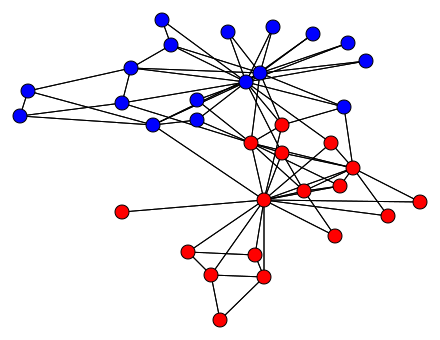

In [10]:
image = svg_graph(adjacency, position, labels=labels_true)
SVG(image)

## To do

* Display the spectrum of the transition matrix (e.g., first 20 eigenvalues). 
* What does the spectrum suggest?
* Display the graph with the embedding in dimension 2.
* Check that the embedding weighted by the degrees is centered and that the components have the same variance.
* How many nodes are misclassified using the sign of the first eigenvector? What are these nodes?

In [11]:
spectral = Spectral(20, normalized=False, regularization=None, scaling=0)

In [ ]:
spectral.fit(adjacency)

In [ ]:
eigenvalues = spectral.eigenvalues_

In [ ]:
embedding = spectral.embedding_

## Openflights


We now consider a larger graph. We use the Laplacian eigenmap in dimension 20. We measure proximity between nodes in terms of [cosine similarity](https://en.wikipedia.org/wiki/Cosine_similarity). Equivalently, we work on the embedding in the unit sphere, which can be obtained through the parameter ``normalized`` of the class ``Spectral``.

In [ ]:
graph = openflights

In [ ]:
adjacency = graph.adjacency
position = graph.position
names = graph.names

In [ ]:
image = svg_graph(adjacency, position, width=800, height=400, node_size=3, display_edges=False)
SVG(image)

## To do

* Display the spectrum of the normalized Laplacian.
* Display the same world map with the scores equal to the cosine similarity to **Beijing** in the embedding space.
* List the 10 closest airports to **Madrid** in terms of cosine similarity in the embedding space.
* Display the same world map with 8 clusters found by k-means in the embedding space (still using cosing similarity).

In [ ]:
spectral = Spectral(20, normalized=True, regularization=None, scaling=0)

In [ ]:
beijing = 1618

In [ ]:
madrid = 572

## 2. Directed graphs

## Wikipedia Vitals

We now consider a large directed graph. We use the class ``BiSpectral`` (i.e., the directed graph is viewed as a bipartite graph).

In [ ]:
graph = wikivitals

In [ ]:
adjacency = graph.adjacency
names = graph.names
labels = graph.labels_hierarchy
names_labels = graph.names_labels_hierarchy

## To do

* Check that the average cosine similarity between all node pairs in some set $S$ is given by the square norm of the barycenter of $S$.
* Give the average cosine similarity between nodes in the **Mammals** category.
* Compare with the expected cosine similarity between two nodes sampled uniformly at random.
* Defining a category as **topical** if its average cosine similarity is high, give the most topical category and the less topical category among all categories having at least 10 articles. 

In [ ]:
spectral = BiSpectral(20, solver=HalkoEig(random_state=42), regularization=None, scaling=0)

In [ ]:
mammal = 274

In [ ]:
names_labels[mammal]

## 3. Bipartite graphs

Finally, we consider the co-embedding of each part of a bipartite graph. We focus on the bipartite graph formed by words used in the summaries of the articles of Wikivitals. 

## Wikipedia Vitals

In [ ]:
graph = wikivitals

In [ ]:
biadjacency = graph.biadjacency
articles = graph.names_row
words = graph.names_col

In [ ]:
biadjacency

## To do

* What are now the most topical category and the less topical category among all categories having at least 10 articles?
* List the 10 most topical words associated with the most topical category, among all words used at least 10 times in the whole dataset.